In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
taxi_data = pd.read_csv('trip.csv')
taxi_data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [4]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [5]:
df = taxi_data.isna().sum()
df

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [6]:
df = taxi_data.isna().mean()
df

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [7]:
df = taxi_data.isna().sum()
df

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [10]:
df_percentage = (df / len(taxi_data)) * 100
df_percentage


passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.013215
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [16]:
print(df_percentage[df_percentage>0])

fare_amount    0.013215
dtype: float64


In [17]:
taxi_data = taxi_data.dropna(subset=['fare_amount'])

taxi_data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
dtype: int64

In [18]:
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

taxi_data.info()
     

<class 'pandas.core.frame.DataFrame'>
Index: 22698 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22698 non-null  object        
 1   tpep_pickup_datetime   22698 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22698 non-null  datetime64[ns]
 3   payment_method         22698 non-null  object        
 4   passenger_count        22698 non-null  int64         
 5   trip_distance          22698 non-null  float64       
 6   fare_amount            22698 non-null  float64       
 7   tip_amount             22698 non-null  float64       
 8   tolls_amount           22698 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
taxi_data['trep_driving_time'] = (taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']).dt.total_seconds() / 60
taxi_data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trep_driving_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.0,14.066667
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.0,26.500000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.0,7.200000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,30.250000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.0,16.716667


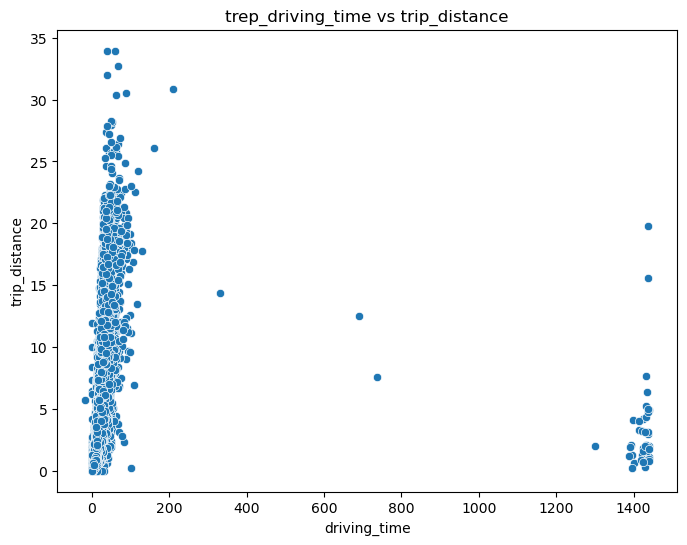

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=taxi_data, x='trep_driving_time', y='trip_distance')
plt.title('trep_driving_time vs trip_distance')
plt.xlabel('driving_time')
plt.ylabel('trip_distance')
plt.show()
     

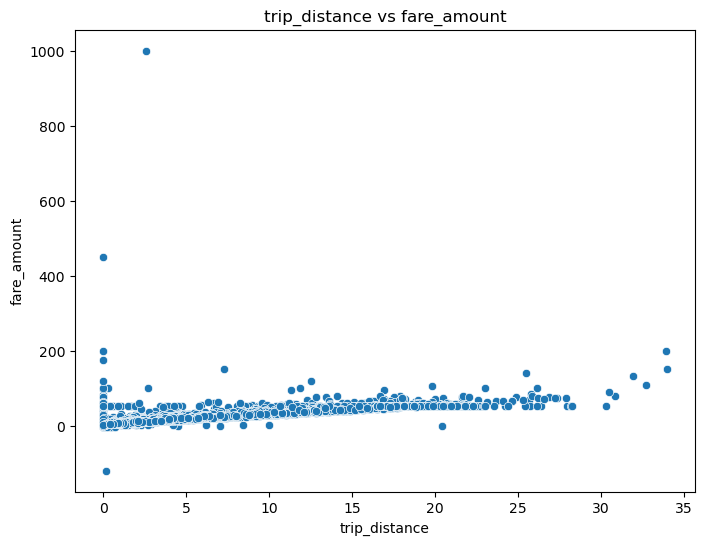

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=taxi_data, x='trip_distance', y='fare_amount')
plt.title('trip_distance vs fare_amount')
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.show()

In [22]:
taxi_data['payment_method'] = taxi_data['payment_method'].replace(['Credit Card', 'Debit Card'], 'Card')
taxi_data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trep_driving_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,14.066667
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,26.500000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,7.200000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,30.250000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,16.716667


In [23]:
taxi_data.describe()


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trep_driving_time
count,22698,22698,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000
mean,2017-06-29 07:26:40.725746688,2017-06-29 07:43:41.432901632,1.643581,2.912318,13.024009,1.835327,0.312302,17.011786
min,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,-120.000000,0.000000,0.000000,-16.983333
25%,2017-03-30 02:35:36.750000128,2017-03-30 02:45:08.500000,1.000000,0.990000,6.500000,0.000000,0.000000,6.650000
50%,2017-06-23 12:31:13.500000,2017-06-23 12:53:38,1.000000,1.610000,9.500000,1.350000,0.000000,11.175000
75%,2017-10-02 10:43:06,2017-10-02 11:07:42.500000,2.000000,3.060000,14.500000,2.450000,0.000000,18.383333
max,2017-12-31 23:45:30,2017-12-31 23:49:24,36.000000,33.960000,999.990000,200.000000,19.100000,1439.550000
std,NaN,NaN,1.304983,3.651335,13.240074,2.800093,1.398775,61.997201


<Axes: xlabel='None', ylabel='passenger_count'>

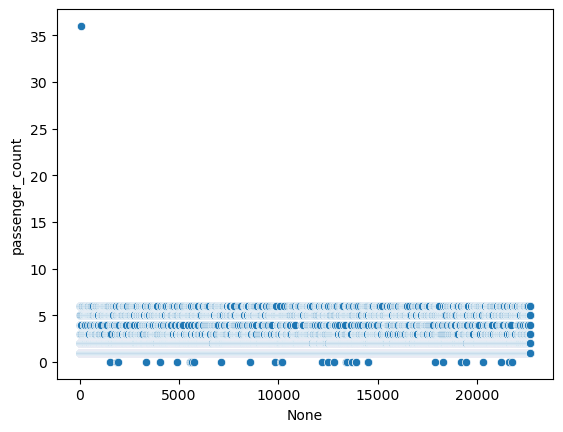

In [24]:
sns.scatterplot(x=taxi_data.index, y=taxi_data['passenger_count'])


<Axes: xlabel='None', ylabel='fare_amount'>

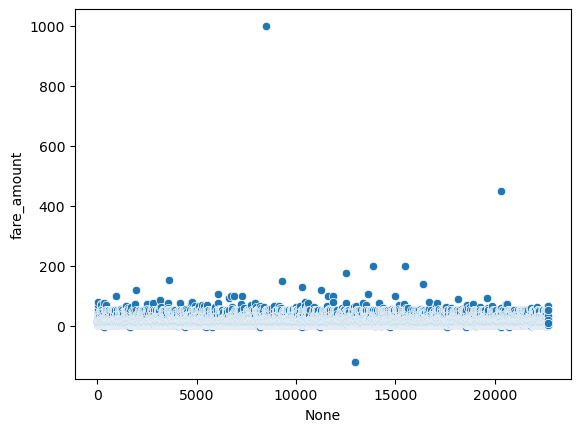

In [25]:
sns.scatterplot(x=taxi_data.index, y=taxi_data['fare_amount'])


<Axes: xlabel='None', ylabel='trep_driving_time'>

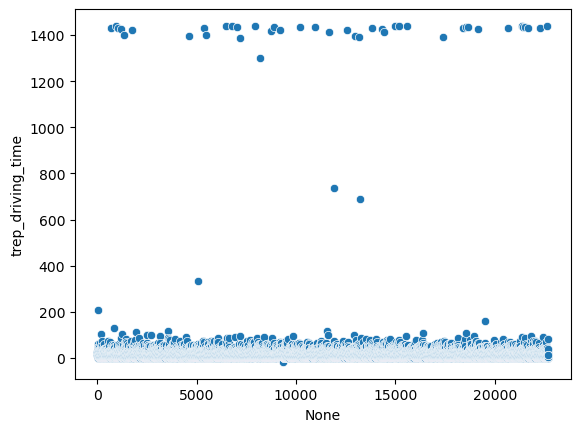

In [26]:
sns.scatterplot(x=taxi_data.index, y=taxi_data['trep_driving_time'])


<Axes: xlabel='None', ylabel='trip_distance'>

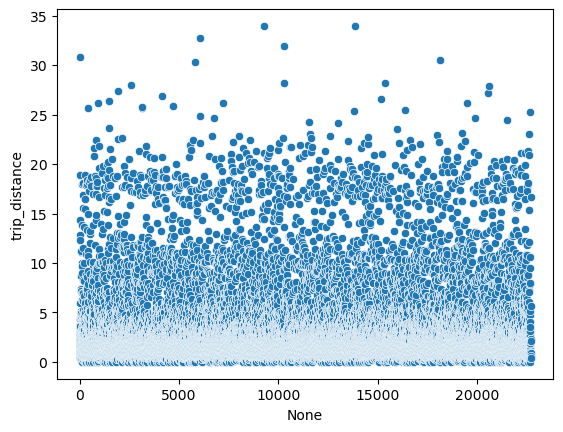

In [27]:
sns.scatterplot(x=taxi_data.index, y=taxi_data['trip_distance'])


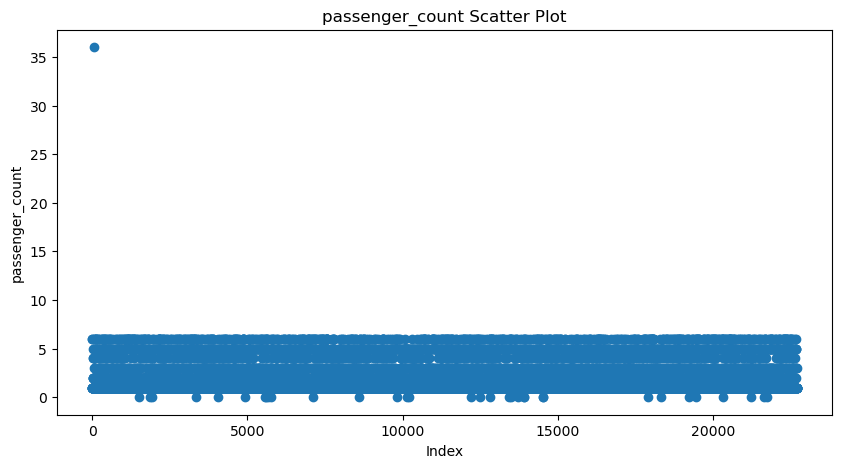

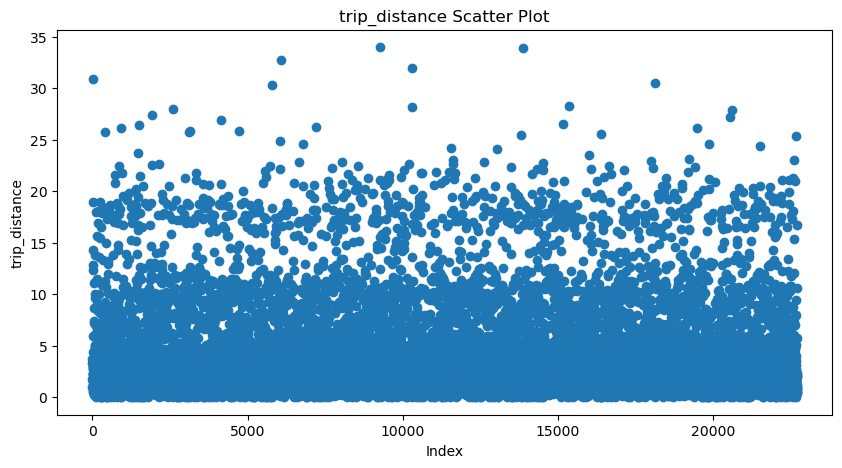

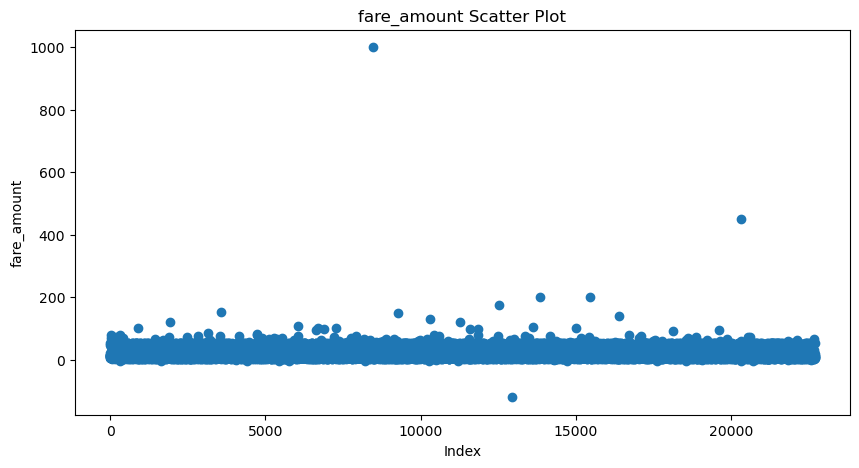

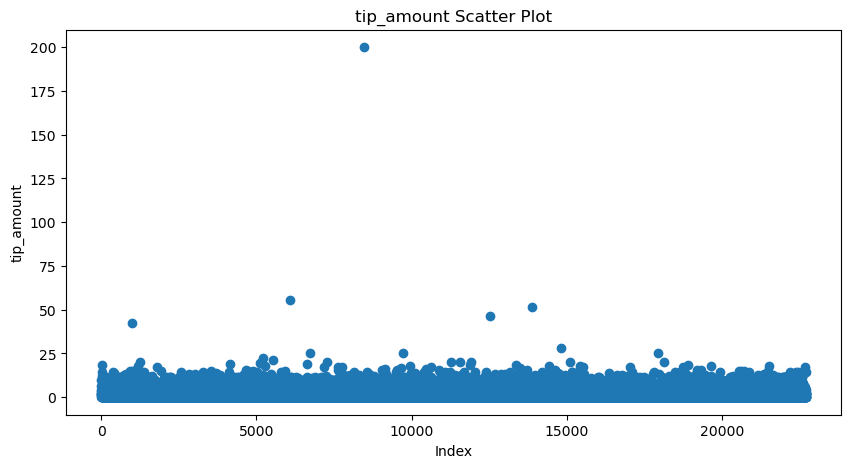

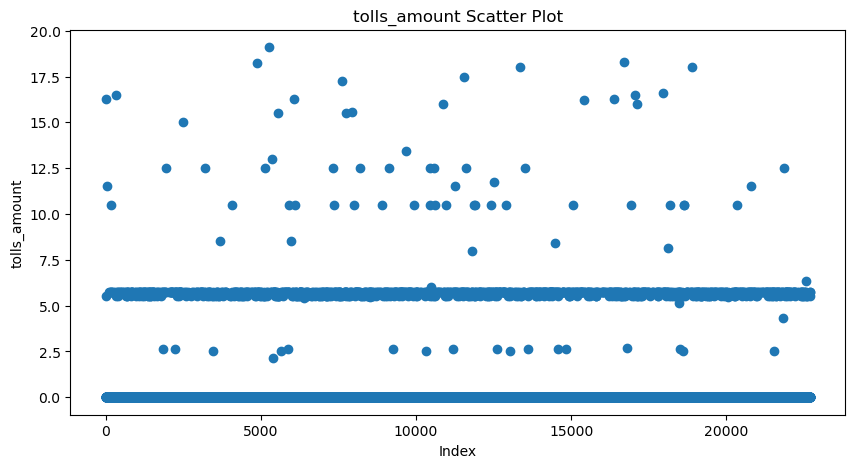

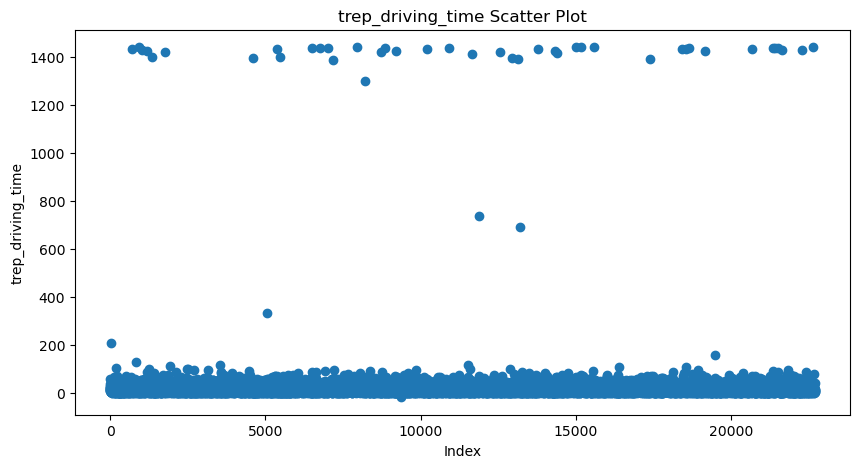

In [28]:
numeric_cols = taxi_data.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    plt.scatter(taxi_data.index, taxi_data[col])
    plt.title(f'{col} Scatter Plot')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()

In [29]:
def is_outlier(row):
    return (
        row['trip_distance'] > 0 and
        row['fare_amount'] > 0 and
        row['passenger_count'] > 0 and
        row['trep_driving_time'] >= 0 and
        row['trip_distance'] < 30 and  # 30 미만으로 설정
        row['fare_amount'] <= 500 and  # 500 이하로 설정
        row['passenger_count'] < 35     # 35 미만으로 설정
    )

taxi_data = taxi_data[taxi_data.apply(lambda row: is_outlier(row), axis=1)]

In [31]:
taxi_data['trip_distance'].sort_values()


4063       0.01
11359      2.50
3084       2.50
20135      2.50
6702       2.50
          ...  
14997    100.00
13623    105.00
1930     120.00
16381    140.00
3584     152.00
Name: fare_amount, Length: 22492, dtype: float64

In [32]:
taxi_data['fare_amount'].sort_values()


4063       0.01
11359      2.50
3084       2.50
20135      2.50
6702       2.50
          ...  
14997    100.00
13623    105.00
1930     120.00
16381    140.00
3584     152.00
Name: fare_amount, Length: 22492, dtype: float64

In [33]:
taxi_data['passenger_count'].sort_values()


22700    1
12444    1
12445    1
12446    1
12447    1
        ..
17995    6
3245     6
17990    6
3298     6
0        6
Name: passenger_count, Length: 22492, dtype: int64

In [34]:
taxi_data['trep_driving_time'].sort_values()


20182       0.016667
7169        0.033333
13308       0.033333
21595       0.033333
22104       0.033333
            ...     
15165    1438.550000
22640    1438.650000
15000    1438.850000
15581    1439.150000
926      1439.550000
Name: trep_driving_time, Length: 22492, dtype: float64

In [35]:
taxi_data


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trep_driving_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.00,14.066667
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00,26.500000
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00,7.200000
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,30.250000
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00,16.716667
...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,3.266667
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,40.800000
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,4.133333
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00,11.933333


In [36]:
taxi_data.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,trep_driving_time
count,22492,22492,22492.000000,22492.000000,22492.000000,22492.000000,22492.000000,22492.000000
mean,2017-06-29 02:39:54.967944448,2017-06-29 02:56:57.736039680,1.646096,2.923546,12.898213,1.815496,0.307275,17.046135
min,2017-01-01 00:08:25,2017-01-01 00:17:20,1.000000,0.010000,0.010000,0.000000,0.000000,0.016667
25%,2017-03-29 23:15:04,2017-03-29 23:25:16.249999872,1.000000,1.000000,6.500000,0.000000,0.000000,6.733333
50%,2017-06-23 08:38:32.500000,2017-06-23 08:56:09,1.000000,1.630000,9.500000,1.360000,0.000000,11.233333
75%,2017-10-01 16:30:10.750000128,2017-10-01 16:42:02.249999872,2.000000,3.090000,14.500000,2.450000,0.000000,18.450000
max,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,28.230000,152.000000,42.290000,19.100000,1439.550000
std,NaN,NaN,1.285782,3.620245,10.643462,2.375483,1.377535,61.561092
